* In the cell below, I execute R code in Julia, by casting the R code to a Julia multiline string:

In [1]:
using RCall
R"""
library("compiler")
library(glmnet)

cmpfun(coef)
cmpfun(plot)

#cd = read.csv("usedcars.csv")
cd = read.csv("http://www.rob-mcculloch.org/data/usedcars.csv")
if(!file.exists("usedcars.csv")){
  res <- tryCatch(download.file("http://www.rob-mcculloch.org/data/usedcars.csv",
                            destfile="./usedcars.csv",
                            method="auto"),
              error=function(e) 1)
  cd = read.csv("usedcars.csv")
  if(dat!=1){ cd = read.csv("usedcars.csv") }
}
dim(cd)
## [1] 1000
#7
summary(cd)
"""

┌ Info: Recompiling stale cache file /home/russell/.julia/compiled/v1.1/RCall/8GFyb.ji for RCall [6f49c342-dc21-5d91-9882-a32aef131414]
└ @ Base loading.jl:1184
┌ Warning: RCall.jl: Loading required package: Matrix
│ Loading required package: foreach
│ Loaded glmnet 2.0-18
│ 
└ @ RCall /home/russell/.julia/packages/RCall/g7dhB/src/io.jl:113


RObject{StrSxp}
     price            trim       isOneOwner    mileage            year     
 Min.   :  599   550    :11825   f:16594    Min.   :     8   Min.   :1994  
 1st Qu.:13495   430    : 2787   t: 3469    1st Qu.: 39888   1st Qu.:2004  
 Median :29454   500    : 2661              Median : 67187   Median :2007  
 Mean   :30747   63 AMG :  599              Mean   : 73114   Mean   :2007  
 3rd Qu.:43995   600    :  572              3rd Qu.: 98213   3rd Qu.:2010  
 Max.   :79999   55 AMG :  356              Max.   :488525   Max.   :2014  
                 (Other): 1263                                             
    color       displacement         fuel           region    
 Black :8194   Min.   :3.000   Diesel  :  211   SoA    :6492  
 Blue  : 914   1st Qu.:4.600   Gasoline:19632   Pac    :3252  
 Gray  :2168   Median :5.500   Hybrid  :  220   Mid    :2671  
 other : 961   Mean   :5.059                    WSC    :2493  
 Silver:4353   3rd Qu.:5.500                    ENC    :1984 

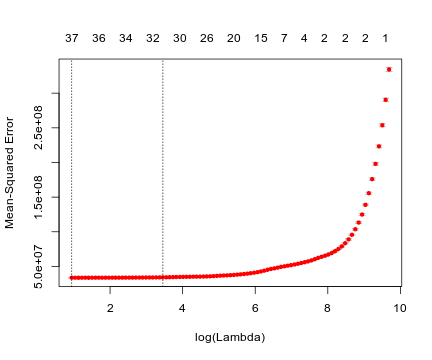

RObject{NilSxp}
NULL


In [2]:
R"""
tdf = data.frame(x1 = as.factor(rep(1:3,3)),x2=rnorm(9))
X = model.matrix(~.,tdf)
#attr(,"assign")
#attr(,"contrasts")
#z`attr(,"contrasts")$x1
x = model.matrix(price~.,cd)[,-1] #drop the one vector
dim(x)
colnames(x)
head(x)
lm1 = lm(price~.,cd)
lm2 = lm(price~.,data.frame(price=cd$price,x))
summary(lm1$fitted-lm2$fitted)
cvglcd = cv.glmnet(x,cd$price,family="gaussian")
glcd = cvglcd$glmnet.fit
plot(cvglcd) #see cross validation
"""

In [3]:
try
    using GLMNet
    using GLM

catch
    using Pkg
    Pkg.add("GLMNet")
    using GLMNet
    Pkg.add("GLM")
    using GLM
    Pkg.update() #followed by a Pkg.add("Gadfly")


end

┌ Info: Recompiling stale cache file /home/russell/.julia/compiled/v1.1/GLMNet/2sTil.ji for GLMNet [8d5ece8b-de18-5317-b113-243142960cc6]
└ @ Base loading.jl:1184
┌ Info: Recompiling stale cache file /home/russell/.julia/compiled/v1.1/GLM/6OREG.ji for GLM [38e38edf-8417-5370-95a0-9cbb8c7f171a]
└ @ Base loading.jl:1184


### In the code below
* I move data-types/variables from the R name space to the Julia name space

In [4]:

@rget x
@rget cd;

In [5]:
price = cd[:price];

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[5]:1
└ @ Core In[5]:1


In [6]:

using DataFrames
x = DataFrame(x)
describe(x)
first(cd,6);


In [23]:
mat = convert(Matrix, x[:,:])
cd_mat = convert(Array, cd[:price])
using StatsPlots
path = glmnet(mat,cd_mat);
#using Gadfly
#xto_plot = result.fit
cv = glmnetcv(mat, cd_mat)

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[23]:2
└ @ Core In[23]:2


Least Squares GLMNet Cross Validation
95 models for 37 predictors in 10 folds
Best λ 2.569 (mean loss 33675190.223, std 606045.744)

* In the code below I reproduce a figure from the R instructional course content but by using Julia native code.

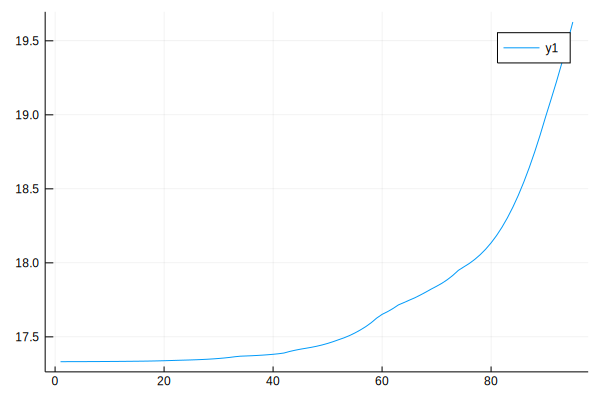

In [33]:
argmin(cv.meanloss)
cv.path.betas[:, 37]
cv.meanloss
using Gadfly
x = log.(cv.meanloss)
x=x[end:-1:1,end:-1:1]
plot(x)

In [20]:
result
using Plots


Least Squares GLMNet Solution Path (95 solutions for 37 predictors in 1688 passes):
───────────────────────────────
      df   pct_dev            λ
───────────────────────────────
 [1]   0  0.0       16131.4    
 [2]   1  0.132062  14698.3    
 [3]   1  0.241703  13392.6    
 [4]   1  0.332729  12202.8    
 [5]   1  0.4083    11118.7    
 [6]   2  0.474096  10131.0    
 [7]   2  0.534698   9230.98   
 [8]   2  0.585005   8410.92   
 [9]   2  0.626743   7663.72   
[10]   2  0.661421   6982.9    
[11]   2  0.690212   6362.56   
[12]   2  0.714115   5797.32   
[13]   2  0.733959   5282.31   
[14]   2  0.750434   4813.04   
[15]   2  0.764112   4385.46   
[16]   2  0.775454   3995.87   
[17]   2  0.784883   3640.89   
[18]   2  0.792713   3317.44   
[19]   2  0.799212   3022.73   
[20]   2  0.804609   2754.2    
[21]   2  0.809089   2509.52   
[22]   4  0.813506   2286.58   
[23]   4  0.819673   2083.45   
[24]   4  0.824782   1898.36   
[25]   4  0.829023   1729.72   
[26]   4  0.832544  

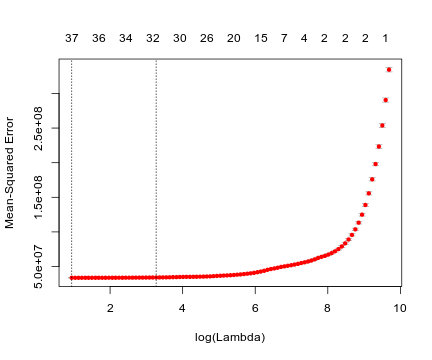

RObject{NilSxp}
NULL


In [34]:
R"""
lm1 = lm(price~.,cd)
lm2 = lm(price~.,data.frame(price=cd$price,x))
summary(lm1$fitted-lm2$fitted)
cvglcd = cv.glmnet(x,cd$price,family="gaussian")
glcd = cvglcd$glmnet.fit
plot(cvglcd) #see cross validation
"""


In [10]:
@doc result

No documentation found.

`result` is of type `GLMNetPath{Normal{Float64}}`.

# Summary

```
struct GLMNetPath{Normal{Float64}} <: Any
```

# Fields

```
family    :: Normal{Float64}
a0        :: Array{Float64,1}
betas     :: CompressedPredictorMatrix
null_dev  :: Float64
dev_ratio :: Array{Float64,1}
lambda    :: Array{Float64,1}
npasses   :: Int64
```
